In [1]:
# module 10
# in this module, we will learn how to work with date and time data within pandas.
# there are lots of interesting stuff that we can do with date and time data.
# we will learn how to properly read in our data so that we can use datetime functionality.
# and also learn how to use filter by datetimes,
# how to group dates by resampling the timeframes 
# and we also take a look of doing some simple plotting within our time series data as well.

In [2]:
import pandas as pd 
df = pd.read_csv("ETH_1h.csv")
df.head()

,Date,Symbol,Open,High,Low,Close,Volume
0,2020-03-13 08-PM,ETHUSD,129.94,131.82,126.87,128.71,1940673.93
1,2020-03-13 07-PM,ETHUSD,119.51,132.02,117.10,129.94,7579741.09
2,2020-03-13 06-PM,ETHUSD,124.47,124.85,115.50,119.51,4898735.81
3,2020-03-13 05-PM,ETHUSD,124.08,127.42,121.63,124.47,2753450.92
4,2020-03-13 04-PM,ETHUSD,124.85,129.51,120.17,124.08,4461424.71


In [3]:
# if we want to see more information about our dataframe,
# for example, if we want to know how many rows and columns there are,
# then we can use shape attribute.
df.shape

(23674, 7)

In [4]:
# now lets actually get into work with datetime data.
# so, we have a date column here, and it looks just that it is giving us every hour of a day.
# but right now it isn't actually a date-time object.
# we can tell that because that is not in the format that date-time object generally display as.
# but if we want to sure, then we can grab any value and try to access pandas date-time method on it.
df.loc[0,"Date"]

'2020-03-13 08-PM'

In [5]:
# now lets use a date-time method on it.
# there is one function called day_name() that will give us the weekday.
df.loc[0,"Date"].day_name()

AttributeError: 'str' object has no attribute 'day_name'

In [10]:
# if we run this, then we can see that this is givving us an-
# AttributeError: 'str' object has no attribute 'day_name'
# this is because it is a string object, not an date-time object.
# so how can we convert that as a date-time?
# so there are few different ways that we can do this and we will go over some of those.

# if we want a column to converted into a date-time object,
# then we can use pandas to_datetime() method.
df["Date"]=pd.to_datetime(df["Date"])
# we wont run that now, if we run this pandas will do his best to convert the datetime.
# but the formatting that we have here is a pretty different format.
# so if we run this this will give us a-
#ParserError: Unknown string format: 2020-03-13 08-PM

ParserError: Unknown string format: 2020-03-13 08-PM

In [11]:
# so what we need to do here is passing a format string specifying how dates are formatted so that it can parse this correctly.
# but datetime formatting is pretty difficult we can hardly remember them all the time.
# so we should went to the python documentation page and see the formatting that we need.
"""docs.python.org/3/library/datetime.html#strftime-and-strptime-format-codes"""
# now we need to pass the format string as the format arguement in our to_datetime() method.
df["Date"]=pd.to_datetime(df["Date"],format="%Y-%m-%d %I-%p")

In [12]:
df["Date"]

0       2020-03-13 20:00:00
1       2020-03-13 19:00:00
2       2020-03-13 18:00:00
3       2020-03-13 17:00:00
4       2020-03-13 16:00:00
                ...        
23669   2017-07-01 15:00:00
23670   2017-07-01 14:00:00
23671   2017-07-01 13:00:00
23672   2017-07-01 12:00:00
23673   2017-07-01 11:00:00
Name: Date, Length: 23674, dtype: datetime64[ns]

In [13]:
# now we can see that we are getting datetime object.
# now since we converted it to datetime objects, now we can use the datetime methods which didnt work before.
df.loc[0,"Date"].day_name()

'Friday'

In [14]:
# now the way we did this here, is that we convert it into datetime object after we loaded our data.
# but if we want to convert it when we are loading in our data, then we can also do that as well.
# where we have loaded in our csv file with read_csv() method,
# there we can pass some arguements in our read_csv() method
# so that it loads in certain columns as datetime 
# and we can pass in our formatting string as well so that it can parse those as the date is read in.
# to do this we need to add parse_dates arguement and set that equal to a list of columns that we want to convert into datetime object.
# now we need to pass a format. we cant pass it as a format arguement.
# instead of that we need to pass a function as the date_parser arguement which converts each string to a datetime object.
"""note that these code will be situated before read_csv() method"""
parser= lambda x: pd.datetime.strptime(x,"%Y-%m-%d %I-%p")
new_df = pd.read_csv("ETH_1h.csv",parse_dates=["Date"],date_parser=parser)
# when we converted the date column before using to_datetime() method, there we actually converted the whole column.
# but in this case, in our lambda function we are passing a string(x variable) as a parameter. 
# so in order to convert a string to datetime object, we can use the pd.datetime.strptime() method.
# there the first arguement would be our string and the second arguement would be the format.

In [15]:
new_df.head()

,Date,Symbol,Open,High,Low,Close,Volume
0,2020-03-13 20:00:00,ETHUSD,129.94,131.82,126.87,128.71,1940673.93
1,2020-03-13 19:00:00,ETHUSD,119.51,132.02,117.10,129.94,7579741.09
2,2020-03-13 18:00:00,ETHUSD,124.47,124.85,115.50,119.51,4898735.81
3,2020-03-13 17:00:00,ETHUSD,124.08,127.42,121.63,124.47,2753450.92
4,2020-03-13 16:00:00,ETHUSD,124.85,129.51,120.17,124.08,4461424.71


In [18]:
# we have seen earliar how to run a datetime methods in our single value.
# but what if we want to run that in our entire series or "Date" column?
# to do this we can access the dt class on the series object and access the datetime methods that way.
df["Date"].dt.day_name()
# using the dt class on the object is very simmilar of how we used str class on any object.

0          Friday
1          Friday
2          Friday
3          Friday
4          Friday
           ...   
23669    Saturday
23670    Saturday
23671    Saturday
23672    Saturday
23673    Saturday
Name: Date, Length: 23674, dtype: object

In [19]:
# lets say, we want to create another column so that we can quickly know what day these trade took place.
# to do that we can simply-
df["Day"]=df["Date"].dt.day_name()

In [20]:
df

,Date,Symbol,Open,High,Low,Close,Volume,Day
0,2020-03-13 20:00:00,ETHUSD,129.94,131.82,126.87,128.71,1940673.93,Friday
1,2020-03-13 19:00:00,ETHUSD,119.51,132.02,117.10,129.94,7579741.09,Friday
2,2020-03-13 18:00:00,ETHUSD,124.47,124.85,115.50,119.51,4898735.81,Friday
3,2020-03-13 17:00:00,ETHUSD,124.08,127.42,121.63,124.47,2753450.92,Friday
4,2020-03-13 16:00:00,ETHUSD,124.85,129.51,120.17,124.08,4461424.71,Friday
...,...,...,...,...,...,...,...,...
23669,2017-07-01 15:00:00,ETHUSD,265.74,272.74,265.00,272.57,1500282.55,Saturday
23670,2017-07-01 14:00:00,ETHUSD,268.79,269.90,265.00,265.74,1702536.85,Saturday
23671,2017-07-01 13:00:00,ETHUSD,274.83,274.93,265.00,268.79,3010787.99,Saturday
23672,2017-07-01 12:00:00,ETHUSD,275.01,275.01,271.00,274.83,824362.87,Saturday


In [26]:
# lets see the earliest and latest dates in this data.
# we can use the min() and max() method.
# to see the earliest date we can use the min() method.
print("Earliest Date:")
df["Date"].min()

Earliest Date:


Timestamp('2017-07-01 11:00:00')

In [24]:
# to see the latest date we can use the max() method.
print("Latest Date:")
df["Date"].max()

Latest Date:


Timestamp('2020-03-13 20:00:00')

In [25]:
# one of the cool thing in datetime, that we can actually substract those dates to see the day between that dates.
# and this called "Timedelta".
df["Date"].max() - df["Date"].min()

Timedelta('986 days 09:00:00')

In [29]:
# what if we want to do some filters by date?
# for example, lets say we want to only see the dates of 2020.
filt= (df["Date"] >= "2020")
# here we can pass in a string 2020 here. pandas will know that we are talking about 2020.
df.loc[filt]

,Date,Symbol,Open,High,Low,Close,Volume,Day
0,2020-03-13 20:00:00,ETHUSD,129.94,131.82,126.87,128.71,1940673.93,Friday
1,2020-03-13 19:00:00,ETHUSD,119.51,132.02,117.10,129.94,7579741.09,Friday
2,2020-03-13 18:00:00,ETHUSD,124.47,124.85,115.50,119.51,4898735.81,Friday
3,2020-03-13 17:00:00,ETHUSD,124.08,127.42,121.63,124.47,2753450.92,Friday
4,2020-03-13 16:00:00,ETHUSD,124.85,129.51,120.17,124.08,4461424.71,Friday
...,...,...,...,...,...,...,...,...
1744,2020-01-01 04:00:00,ETHUSD,129.57,130.00,129.50,129.56,702786.82,Wednesday
1745,2020-01-01 03:00:00,ETHUSD,130.37,130.44,129.38,129.57,496704.23,Wednesday
1746,2020-01-01 02:00:00,ETHUSD,130.14,130.50,129.91,130.37,396315.72,Wednesday
1747,2020-01-01 01:00:00,ETHUSD,128.34,130.14,128.32,130.14,635419.40,Wednesday


In [31]:
# what if we want the data of 2019?
filt= ((df["Date"] < "2020") & (df["Date"] >= "2019"))
df.loc[filt]
# here we need to use the "&" sign instead of "and" and "|" instead of "or".

,Date,Symbol,Open,High,Low,Close,Volume,Day
1749,2019-12-31 23:00:00,ETHUSD,128.33,128.69,128.14,128.54,440678.91,Tuesday
1750,2019-12-31 22:00:00,ETHUSD,128.38,128.69,127.95,128.33,554646.02,Tuesday
1751,2019-12-31 21:00:00,ETHUSD,127.86,128.43,127.72,128.38,350155.69,Tuesday
1752,2019-12-31 20:00:00,ETHUSD,127.84,128.34,127.71,127.86,428183.38,Tuesday
1753,2019-12-31 19:00:00,ETHUSD,128.69,128.69,127.60,127.84,1169847.84,Tuesday
...,...,...,...,...,...,...,...,...
10504,2019-01-01 04:00:00,ETHUSD,130.75,133.96,130.74,131.96,2791135.37,Tuesday
10505,2019-01-01 03:00:00,ETHUSD,130.06,130.79,130.06,130.75,503732.63,Tuesday
10506,2019-01-01 02:00:00,ETHUSD,130.79,130.88,129.55,130.06,838183.43,Tuesday
10507,2019-01-01 01:00:00,ETHUSD,131.62,131.62,130.77,130.79,434917.99,Tuesday


In [36]:
# right now we are using strings here for comparison and we can actually use the date formats as well.
# to do that we need to first convert the string into a datetime object using to_datetime() method.
start=pd.to_datetime("2019-1-1")
end=pd.to_datetime("2020-1-1")
filt= ((df["Date"] >= start) & (df["Date"] < end))
df.loc[filt]

,Date,Symbol,Open,High,Low,Close,Volume,Day
1749,2019-12-31 23:00:00,ETHUSD,128.33,128.69,128.14,128.54,440678.91,Tuesday
1750,2019-12-31 22:00:00,ETHUSD,128.38,128.69,127.95,128.33,554646.02,Tuesday
1751,2019-12-31 21:00:00,ETHUSD,127.86,128.43,127.72,128.38,350155.69,Tuesday
1752,2019-12-31 20:00:00,ETHUSD,127.84,128.34,127.71,127.86,428183.38,Tuesday
1753,2019-12-31 19:00:00,ETHUSD,128.69,128.69,127.60,127.84,1169847.84,Tuesday
...,...,...,...,...,...,...,...,...
10504,2019-01-01 04:00:00,ETHUSD,130.75,133.96,130.74,131.96,2791135.37,Tuesday
10505,2019-01-01 03:00:00,ETHUSD,130.06,130.79,130.06,130.75,503732.63,Tuesday
10506,2019-01-01 02:00:00,ETHUSD,130.79,130.88,129.55,130.06,838183.43,Tuesday
10507,2019-01-01 01:00:00,ETHUSD,131.62,131.62,130.77,130.79,434917.99,Tuesday


In [38]:
# now one nice feature about date is that if we set our index so that uses the date
# which would actually be a good idea because all of this dates/time stamps are unique.
# then we can actually do the same thing by using slicing instead.

# so first lets set our index.
df.set_index("Date",inplace=True)

In [39]:
df

,Symbol,Open,High,Low,Close,Volume,Day
Date,,,,,,,
2020-03-13 20:00:00,ETHUSD,129.94,131.82,126.87,128.71,1940673.93,Friday
2020-03-13 19:00:00,ETHUSD,119.51,132.02,117.10,129.94,7579741.09,Friday
2020-03-13 18:00:00,ETHUSD,124.47,124.85,115.50,119.51,4898735.81,Friday
2020-03-13 17:00:00,ETHUSD,124.08,127.42,121.63,124.47,2753450.92,Friday
2020-03-13 16:00:00,ETHUSD,124.85,129.51,120.17,124.08,4461424.71,Friday
...,...,...,...,...,...,...,...
2017-07-01 15:00:00,ETHUSD,265.74,272.74,265.00,272.57,1500282.55,Saturday
2017-07-01 14:00:00,ETHUSD,268.79,269.90,265.00,265.74,1702536.85,Saturday
2017-07-01 13:00:00,ETHUSD,274.83,274.93,265.00,268.79,3010787.99,Saturday


In [40]:
# now with that date index we can actually filter our dates just by passing them into our brackets.
# we can also use .loc[] indexer.
# if we want to se ethe data for only 2019.
# then we can-
df["2019"]

,Symbol,Open,High,Low,Close,Volume,Day
Date,,,,,,,
2019-12-31 23:00:00,ETHUSD,128.33,128.69,128.14,128.54,440678.91,Tuesday
2019-12-31 22:00:00,ETHUSD,128.38,128.69,127.95,128.33,554646.02,Tuesday
2019-12-31 21:00:00,ETHUSD,127.86,128.43,127.72,128.38,350155.69,Tuesday
2019-12-31 20:00:00,ETHUSD,127.84,128.34,127.71,127.86,428183.38,Tuesday
2019-12-31 19:00:00,ETHUSD,128.69,128.69,127.60,127.84,1169847.84,Tuesday
...,...,...,...,...,...,...,...
2019-01-01 04:00:00,ETHUSD,130.75,133.96,130.74,131.96,2791135.37,Tuesday
2019-01-01 03:00:00,ETHUSD,130.06,130.79,130.06,130.75,503732.63,Tuesday
2019-01-01 02:00:00,ETHUSD,130.79,130.88,129.55,130.06,838183.43,Tuesday


In [42]:
# now if we want to grab dates of specific range then we can use a slice.
# lets say we want all of the data of january and february of 2020.
df["2020-1":"2020-2"]
# remember that, here the last value will be inclusive in pandas.

,Symbol,Open,High,Low,Close,Volume,Day
Date,,,,,,,
2020-02-29 23:00:00,ETHUSD,223.35,223.58,216.83,217.31,1927939.88,Saturday
2020-02-29 22:00:00,ETHUSD,223.48,223.59,222.14,223.35,535998.57,Saturday
2020-02-29 21:00:00,ETHUSD,224.63,225.14,222.74,223.48,561158.03,Saturday
2020-02-29 20:00:00,ETHUSD,225.31,225.33,223.50,224.63,511648.65,Saturday
2020-02-29 19:00:00,ETHUSD,225.09,225.85,223.87,225.31,1250856.20,Saturday
...,...,...,...,...,...,...,...
2020-01-01 04:00:00,ETHUSD,129.57,130.00,129.50,129.56,702786.82,Wednesday
2020-01-01 03:00:00,ETHUSD,130.37,130.44,129.38,129.57,496704.23,Wednesday
2020-01-01 02:00:00,ETHUSD,130.14,130.50,129.91,130.37,396315.72,Wednesday


In [44]:
# this will be very easy for analyzing data.
# lets say we want to print the avarage closing price for all of our rows of these dates.
# to do that we can simply grab the close column here and grab the mean.
# first lets just access the close column
df["2020-1":"2020-2"]["Close"]

Date
2020-02-29 23:00:00    217.31
2020-02-29 22:00:00    223.35
2020-02-29 21:00:00    223.48
2020-02-29 20:00:00    224.63
2020-02-29 19:00:00    225.31
                        ...  
2020-01-01 04:00:00    129.56
2020-01-01 03:00:00    129.57
2020-01-01 02:00:00    130.37
2020-01-01 01:00:00    130.14
2020-01-01 00:00:00    128.34
Name: Close, Length: 1440, dtype: float64

In [45]:
# now lets calculate the avarage using mean() function.
df["2020-1":"2020-2"]["Close"].mean()

195.1655902777778

In [46]:
# what if we want to see this data in a different way?
# what if we want to look at this data at a daily basis instead of a hourly basis?
# first we need to think about what will make sense to view on a daily basis.
# for example, lets say we want to view the high's for each day.
# right now we have all of these highs broken down by hours.
# first look at the first 24 of rows so that we can see 24 hours.
df["2020-1":"2020-2"].head(24)

,Symbol,Open,High,Low,Close,Volume,Day
Date,,,,,,,
2020-02-29 23:00:00,ETHUSD,223.35,223.58,216.83,217.31,1927939.88,Saturday
2020-02-29 22:00:00,ETHUSD,223.48,223.59,222.14,223.35,535998.57,Saturday
2020-02-29 21:00:00,ETHUSD,224.63,225.14,222.74,223.48,561158.03,Saturday
2020-02-29 20:00:00,ETHUSD,225.31,225.33,223.50,224.63,511648.65,Saturday
2020-02-29 19:00:00,ETHUSD,225.09,225.85,223.87,225.31,1250856.20,Saturday
2020-02-29 18:00:00,ETHUSD,225.53,226.17,224.50,225.09,496543.91,Saturday
2020-02-29 17:00:00,ETHUSD,222.68,225.53,222.24,225.53,611136.47,Saturday
2020-02-29 16:00:00,ETHUSD,224.17,225.93,222.36,222.68,694384.75,Saturday
2020-02-29 15:00:00,ETHUSD,223.35,225.88,221.80,224.17,550893.74,Saturday


In [48]:
# now we can see every row has a highest value based on hour.
# but we may think what is the highest value of that day.
# lets grab a single day here and then look at the high value.
df["2020-1-1"]["High"]

Date
2020-01-01 23:00:00    130.27
2020-01-01 22:00:00    131.41
2020-01-01 21:00:00    131.99
2020-01-01 20:00:00    131.87
2020-01-01 19:00:00    131.72
2020-01-01 18:00:00    132.14
2020-01-01 17:00:00    132.68
2020-01-01 16:00:00    132.56
2020-01-01 15:00:00    132.15
2020-01-01 14:00:00    132.05
2020-01-01 13:00:00    132.08
2020-01-01 12:00:00    131.31
2020-01-01 11:00:00    131.42
2020-01-01 10:00:00    130.33
2020-01-01 09:00:00    130.22
2020-01-01 08:00:00    130.01
2020-01-01 07:00:00    130.25
2020-01-01 06:00:00    130.25
2020-01-01 05:00:00    129.94
2020-01-01 04:00:00    130.00
2020-01-01 03:00:00    130.44
2020-01-01 02:00:00    130.50
2020-01-01 01:00:00    130.14
2020-01-01 00:00:00    128.54
Name: High, dtype: float64

In [49]:
# now we need to calculate the high value of tthe entire day.
# we can do it max() method.
df["2020-1-1"]["High"].max()

132.68

In [51]:
# now we are going to see how to resample our data so that we can get the highest trade for each day.
# here our data is broken down hourly basis.
# if we want to redo this based on month, day, week or things like that.
# it is called "Resampling".
# if we want to resample this and see the high value by day-
# then we can simply accesss the high column and on that series we can use resample() method.
df["High"].resample("D").max()
# in the arguements we have to tell pandas how we want to resmaple this data.
# resampling arguements:
# "D"-------------day
# "2D"/"3D"/"5D"--- 2days,3days,5days....
# "W"-------------week
# we can see all this in the documentation.
"""pandas.pydata.org/pandas-docs/stable/user-guide/timeseries.html#dateoffset-objects"""
# after we put the arguements we have to tell pandas what we want to do with this resamplings.
# here we want to see the maximum or the highest value, so we need to use max() method.

Date
2017-07-01    279.99
2017-07-02    293.73
2017-07-03    285.00
2017-07-04    282.83
2017-07-05    274.97
               ...  
2020-03-09    208.65
2020-03-10    206.28
2020-03-11    202.98
2020-03-12    195.64
2020-03-13    148.00
Freq: D, Name: High, Length: 987, dtype: float64

In [52]:
# if we run this we can see, it gives us a series for all of high values based on each day.
# now lets save this series as a new variable and look up the dates specific dates that we used before.
highs = df["High"].resample("D").max()
highs["2020-1-1"]
# now instead of getting one date at a timw that we did before,
# we can do it easily with highs series since we resampled this by days.

132.68

In [54]:
# so why this is useful?
# we can do some more interesting stuff with that as well.
# lets say maybe we wanted to plot this out.
# but instead of seeing a plot which have this price broken by hours,
# now we can easily have a plot which is broken by days.

# within jupyter notebook it is extreamly easy to plot out this information.
# to create plot we need to use a special line in jupyter noetbook that allows us to create plots within our browser.
# the special line is-
%matplotlib inline

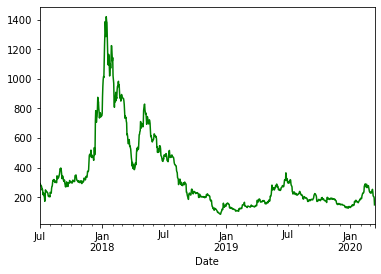

In [58]:
# we can actually use one line of code to plot that out.
# because our highs varible have all the information in it.
# so to create a line plot-
highs.plot(color="g")

In [59]:
# what if we want to resample multiple columns at once?
# we can do that by applying resample method on our entire dataframe.
# it means we want to resample the dataframe by dates,
# and we also want the closing values will be avarage, the sum of volumes, higest value in high, lowest value in low.

# if we want the same aggregation method on everything then we can just put in the method after that.
df.resample("W").mean()

,Open,High,Low,Close,Volume
Date,,,,,
2017-07-02,268.066486,271.124595,264.819730,268.202162,2.185035e+06
2017-07-09,261.337024,262.872917,259.186190,261.062083,1.337349e+06
2017-07-16,196.193214,199.204405,192.722321,195.698393,2.986756e+06
2017-07-23,212.351429,215.779286,209.126310,212.783750,4.298593e+06
2017-07-30,203.496190,205.110357,201.714048,203.309524,1.581729e+06
...,...,...,...,...,...
2020-02-16,255.021667,257.255238,252.679762,255.198452,2.329087e+06
2020-02-23,265.220833,267.263690,262.948512,265.321905,1.826094e+06
2020-03-01,236.720536,238.697500,234.208750,236.373988,2.198762e+06


In [60]:
# but that not what we want.
# so how can we resample this by using different multiple aggregations on multiple column?
# so what we need to do here is just using th agg() method.
# the agg() method also accepts a map of columns and aggregation functions that we want to run on that column.
df.resample("W").agg({"Close":"mean","High":"max","Low":"mean","Volume":"sum"})
# here we need to pass a dictionary in the agg function.
# the keys will be the column name and the values will be the aggregations function.

,Close,High,Low,Volume
Date,,,,
2017-07-02,268.202162,293.73,264.819730,8.084631e+07
2017-07-09,261.062083,285.00,259.186190,2.246746e+08
2017-07-16,195.698393,240.33,192.722321,5.017750e+08
2017-07-23,212.783750,249.40,209.126310,7.221637e+08
2017-07-30,203.309524,229.99,201.714048,2.657305e+08
...,...,...,...,...
2020-02-16,255.198452,290.00,252.679762,3.912867e+08
2020-02-23,265.321905,287.13,262.948512,3.067838e+08
2020-03-01,236.373988,278.13,234.208750,3.693920e+08
